<a href="https://colab.research.google.com/github/meghnakaintura12/mid-term-/blob/main/MID_TERM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.0 import
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# 2.1 Read Driving data such as acc,turns

path ="/gdrive/MyDrive/Colab_data_files/deeplearning/"



In [ ]:
# 2.2
data = pd.read_csv("/gdrive/MyDrive/deeplearning/creditcard.csv")
#pd.read_csv(path + "test_motion_data.csv")  /Colab_data_files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2.2.1
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# 2.2.2
data.shape   # (10000, 14)

(284807, 31)

In [ ]:
data['Class'].unique()

array([0, 1])

In [ ]:
# 2.3 Pop out target
y = data.pop('Class')

In [ ]:
# 2.3.1
data.shape

(284807, 30)

In [ ]:
# 3.0 Check NULL
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [ ]:
# 4.0 test and train split
X_train,X_test, y_train,y_test = train_test_split(data, y, test_size = 0.25)

In [ ]:
X_train.shape
X_test.shape

(213605, 30)

(71202, 30)

In [ ]:
y.shape

(284807,)

In [ ]:
# 5.0 scaling
mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler()

In [ ]:
# 5.1 transform
X_train = mm.transform(X_train)
X_test = mm.transform(X_test)

## Model

In [ ]:
# 6.0 Blank model
model = tf.keras.Sequential()

In [ ]:
# 6.1 input layer
model.add(tf.keras.layers.Input(shape=(30,)))

In [ ]:
# 6.2 hidden layer 1
model.add(tf.keras.layers.Dense(150, activation = 'relu'))

In [ ]:
# 6.3 hidden layer 2
model.add(tf.keras.layers.Dense(200, activation = 'relu'))

In [ ]:
# 6.4 hidden layer 3
model.add(tf.keras.layers.Dense(100, activation = 'relu'))

In [ ]:
# 6.5 output layer
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [ ]:
# 7.0 model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               4650      
                                                                 
 dense_1 (Dense)             (None, 200)               30200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 55,051
Trainable params: 55,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 8.0 plot
from tensorflow.keras.utils import plot_model

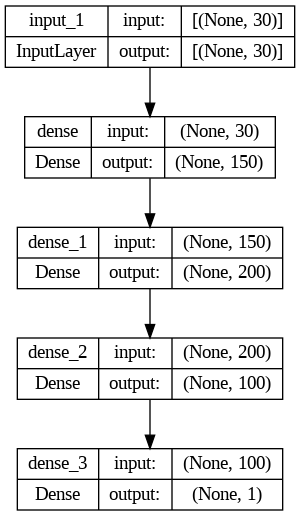

In [ ]:
# 8.1 plot model
plot_model(model, show_shapes=True)

In [ ]:
# 9.0 compile model
model.compile(
                 loss = 'binary_crossentropy',
                 optimizer = 'adam',  # Try first with default optimizer and then with 'adam'
                                      #  may not make much difference
                 metrics = ['acc']
              )

In [ ]:
# 9.1
history = model.fit(X_train,y_train,
                    epochs = 50,
                    validation_data = (X_test, y_test)
                   )

Epoch 1/50
6676/6676 [==============================] - 27s 4ms/step - loss: 0.0058 - acc: 0.9988 - val_loss: 0.0056 - val_acc: 0.9989
Epoch 2/50
6676/6676 [==============================] - 25s 4ms/step - loss: 0.0040 - acc: 0.9994 - val_loss: 0.0081 - val_acc: 0.9987
Epoch 3/50
6676/6676 [==============================] - 23s 3ms/step - loss: 0.0037 - acc: 0.9994 - val_loss: 0.0051 - val_acc: 0.9992
Epoch 4/50
6676/6676 [==============================] - 24s 4ms/step - loss: 0.0038 - acc: 0.9994 - val_loss: 0.0048 - val_acc: 0.9992
Epoch 5/50
6676/6676 [==============================] - 26s 4ms/step - loss: 0.0036 - acc: 0.9994 - val_loss: 0.0052 - val_acc: 0.9991
Epoch 6/50
6676/6676 [==============================] - 24s 4ms/step - loss: 0.0036 - acc: 0.9994 - val_loss: 0.0047 - val_acc: 0.9992
Epoch 7/50
6676/6676 [==============================] - 35s 5ms/step - loss: 0.0037 - acc: 0.9994 - val_loss: 0.0044 - val_acc: 0.9991
Epoch 8/50
6676/6676 [==============================] -

In [ ]:
# 9.2
model.evaluate(X_test,y_test)


2226/2226 [==============================] - 5s 2ms/step - loss: 0.0038 - acc: 0.9993


[0.0037791419308632612, 0.9992556571960449]

2226/2226 [==============================] - 3s 1ms/step
Confusion Matrix:
 [[71053    16]
 [   37    96]]


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

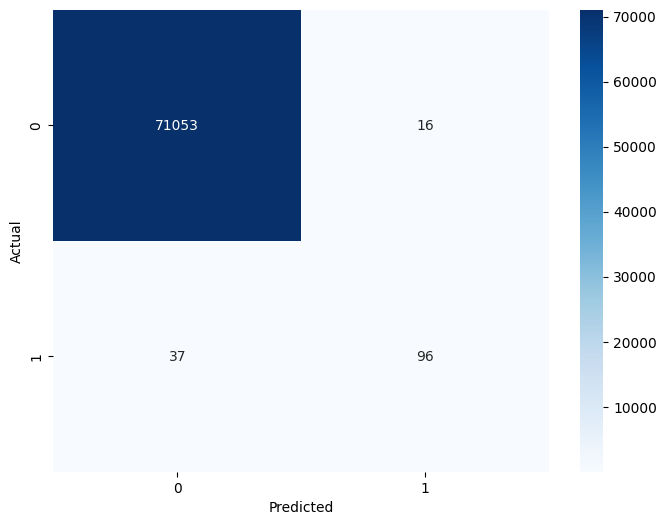

In [ ]:

# 10.0 Make predictions on the test set
pred_test = model.predict(X_test)
pred_test = (pred_test > 0.5).astype(int)

# 11.0 Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, pred_test)
print("Confusion Matrix:\n", conf_matrix)

# 11.1 Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




